# Affordance Heatmaps

This notebook visualizes the pick and place affordance predictions of a pre-trained `multi-language-conditioned` agent from the quickstart guide.

### Setup

- Set the root folder environment variable with `export CLIPORT_ROOT=<cliport_root>`
- Complete the [quickstart guide](https://github.com/cliport/cliport#quickstart) in README.md
- Generate `val` and `test` splits for the task you want to evaluate on by running `python cliport/demos.py n=10 mode=test task=stack-block-pyramid-seq-seen-colors`

In [6]:
# set GPU
%env CUDA_VISIBLE_DEVICES=0
%env RAVENS_ROOT=/home/franka/fr3_workspace/RealWorldLLM/ravens/
import os
import sys
import json
import sys
sys.path.append('/home/franka/fr3_workspace/RealWorldLLM/cliport/')
import numpy as np
from cliport import tasks
from cliport import agents
from cliport.utils import utils
from cliport.environments.environment import Environment
import torch
sys.path.append(os.environ['RAVENS_ROOT'])
# from ravens import tasks
# from ravens.environments.environment import Environment
from ravens.dataset import RavensDataset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


env: CUDA_VISIBLE_DEVICES=0
env: RAVENS_ROOT=/home/franka/fr3_workspace/RealWorldLLM/ravens/


### Settings

In [7]:
train_demos = 1000 # number training demonstrations used to train agent
n_eval = 1 # number of evaluation instances
mode = 'test' # val or test

agent_name = 'cliport'
model_task = 'multi-language-conditioned' # multi-task agent conditioned with language goals

model_folder = 'cliport_quickstart' # path to pre-trained checkpoint
ckpt_name = 'last.ckpt' # name of checkpoint to load

draw_grasp_lines = True
affordance_heatmap_scale = 30

### Uncomment the task you want to evaluate on ###
# eval_task = 'align-rope'
# eval_task = 'assembling-kits-seq-seen-colors'
# eval_task = 'assembling-kits-seq-unseen-colors'
# eval_task = 'packing-shapes'
# eval_task = 'packing-boxes-pairs-seen-colors'
# eval_task = 'packing-boxes-pairs-unseen-colors'
# eval_task = 'packing-seen-google-objects-seq'
# eval_task = 'packing-unseen-google-objects-seq'
# eval_task = 'packing-seen-google-objects-group'
# eval_task = 'packing-unseen-google-objects-group'
# eval_task = 'put-block-in-bowl-seen-colors'
# eval_task = 'put-block-in-bowl-unseen-colors'
# eval_task = 'stack-block-pyramid-seq-seen-colors'
# eval_task = 'stack-block-pyramid-seq-unseen-colors'
# eval_task = 'separating-piles-seen-colors'
# eval_task = 'separating-piles-unseen-colors'
eval_task = 'towers-of-hanoi-seq-seen-colors'
# eval_task = 'towers-of-hanoi-seq-unseen-colors'
print(tasks)

<module 'cliport.tasks' from '/home/franka/fr3_workspace/RealWorldLLM/cliport/cliport/tasks/__init__.py'>


### Load Configs and Agent

In [8]:
root_dir = '/home/franka/fr3_workspace/RealWorldLLM/cliport/'
assets_root = os.path.join(root_dir, 'cliport/environments/assets/')
config_file = 'eval.yaml' 

vcfg = utils.load_hydra_config(os.path.join(root_dir, f'cliport/cfg/{config_file}'))
vcfg['data_dir'] = '/home/mnt/data/ravens/'
vcfg['mode'] = mode

vcfg['model_task'] = model_task
vcfg['eval_task'] = eval_task
vcfg['agent'] = agent_name

# Model and training config paths
model_path = os.path.join(root_dir, model_folder)
vcfg['train_config'] = f"{model_path}/{vcfg['model_task']}-{vcfg['agent']}-n{train_demos}-train/.hydra/config.yaml"
vcfg['model_path'] = f"{model_path}/{vcfg['model_task']}-{vcfg['agent']}-n{train_demos}-train/checkpoints/"

tcfg = utils.load_hydra_config(vcfg['train_config'])

# Load dataset
ds = RavensDataset(os.path.join(vcfg['data_dir'], f'{vcfg["eval_task"]}-{vcfg["mode"]}'), 
                   tcfg, 
                   n_demos=n_eval,
                   augment=False)

eval_run = 0
name = '{}-{}-{}-{}'.format(vcfg['eval_task'], vcfg['agent'], n_eval, eval_run)
print(f'\nEval ID: {name}\n')

# Initialize agent
utils.set_seed(eval_run, torch=True)
agent = agents.names[vcfg['agent']](name, tcfg, None, ds)

# Load checkpoint
ckpt_path = os.path.join(vcfg['model_path'], ckpt_name)
print(f'\nLoading checkpoint: {ckpt_path}')
agent.load(ckpt_path)



Eval ID: towers-of-hanoi-seq-seen-colors-cliport-1-0



/home/pjw971022/anaconda3/envs/omni/lib/python3.9/site-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Attn FCN - Stream One: plain_resnet_lat, Stream Two: clip_lingunet_lat, Stream Fusion: add
Transport FCN - Stream One: plain_resnet_lat, Stream Two: clip_lingunet_lat, Stream Fusion: conv
Agent: towers-of-hanoi-seq-seen-colors-cliport-1-0, Logging: False

Loading checkpoint: /home/franka/fr3_workspace/RealWorldLLM/cliport/cliport_quickstart/multi-language-conditioned-cliport-n1000-train/checkpoints/last.ckpt


### Spawn Environment

In [9]:
# Initialize environment and task.
env = Environment(
    '/home/franka/fr3_workspace/RealWorldLLM/cliport/cliport/environments/assets/',
    disp=False,
    shared_memory=False,
    hz=480,
    record_cfg=False
)


text argument:/home/franka/fr3_workspace/RealWorldLLM/cliport/cliport/environments/assets/
int args: [

### Evaluate Agent


Evaluation Instance: 1/1
Task name:  towers-of-hanoi-seq-seen-colors
<module 'cliport.tasks' from '/home/franka/fr3_workspace/RealWorldLLM/cliport/cliport/tasks/__init__.py'>
Step: 0 (14 max)
lang goal in Transport: move the cyan ring to the darker brown side
Lang Goal: move the cyan ring to the darker brown side
Step: 1 (14 max)
lang goal in Transport: move the yellow ring to the middle of the stand
Lang Goal: move the yellow ring to the middle of the stand
Step: 2 (14 max)
lang goal in Transport: move the cyan ring to the middle of the stand
Lang Goal: move the cyan ring to the middle of the stand
Step: 3 (14 max)
lang goal in Transport: move the gray ring to the darker brown side
Lang Goal: move the gray ring to the darker brown side
Step: 4 (14 max)
lang goal in Transport: move the cyan ring to the lighter brown side
Lang Goal: move the cyan ring to the lighter brown side
Step: 5 (14 max)
lang goal in Transport: move the yellow ring to the darker brown side
Lang Goal: move the yel

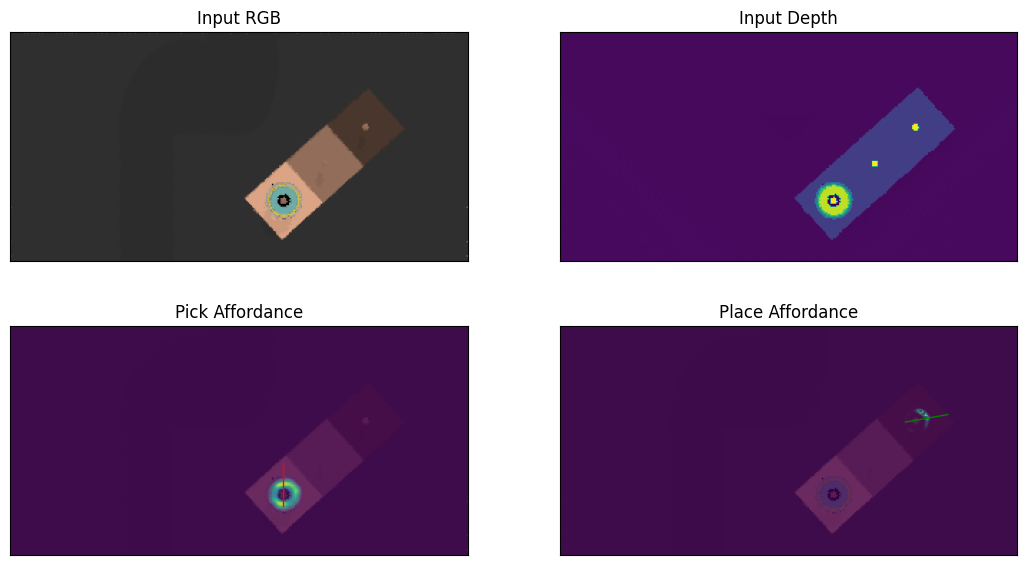

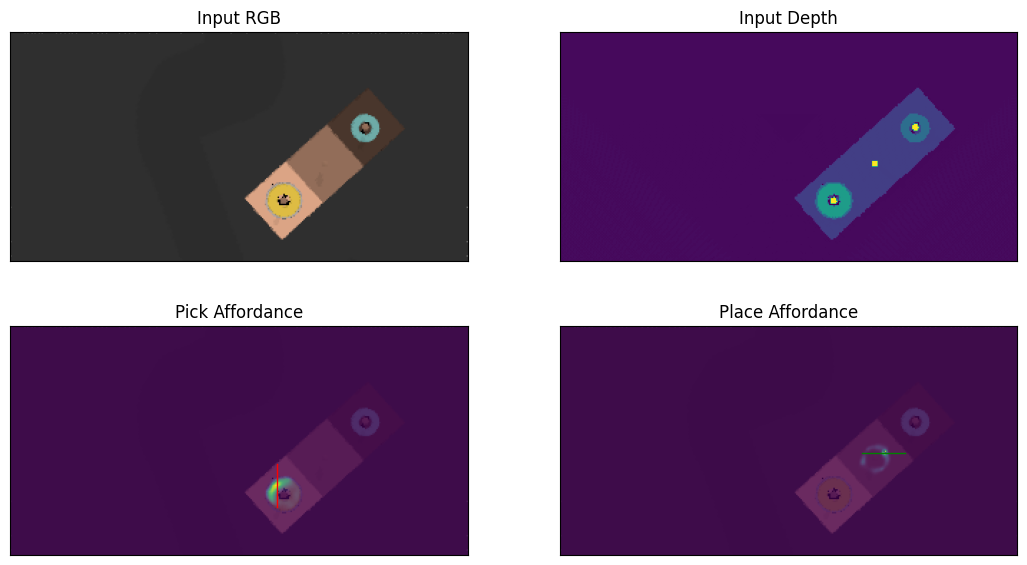

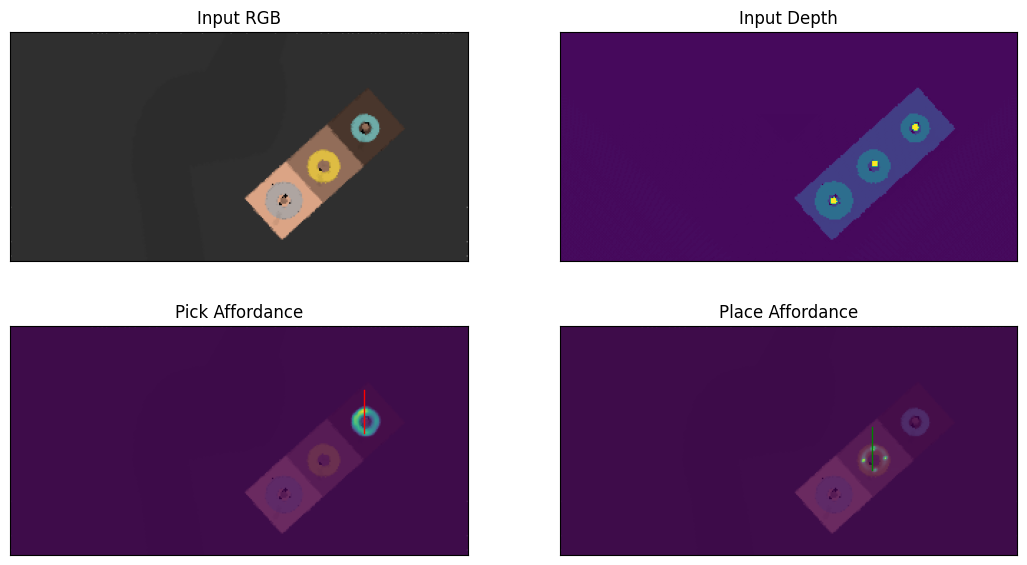

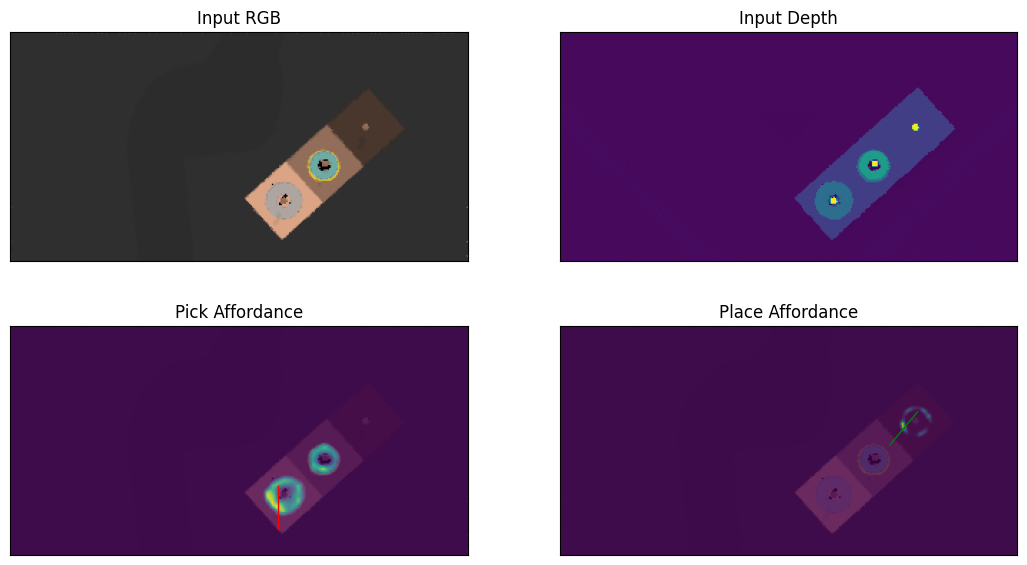

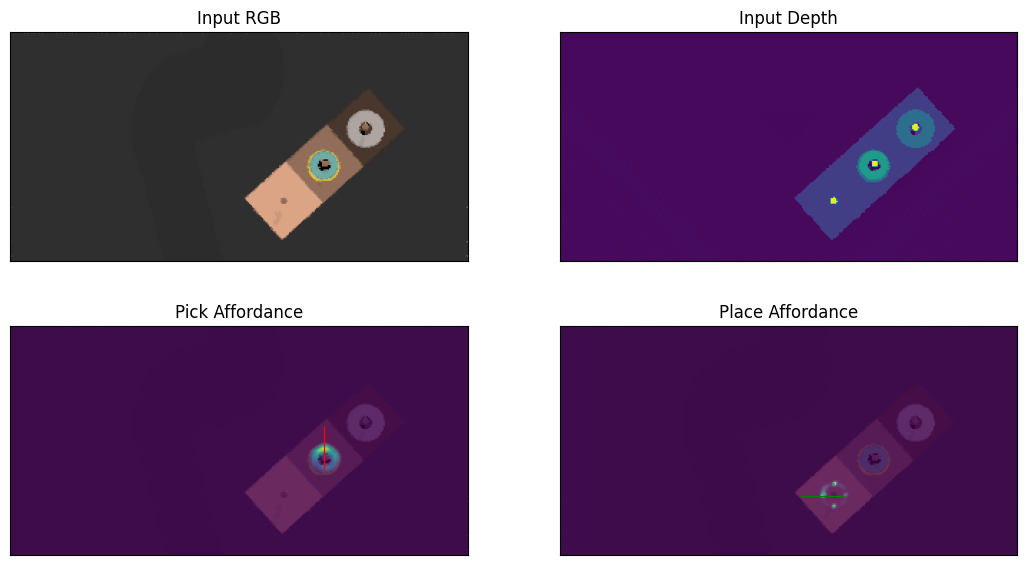

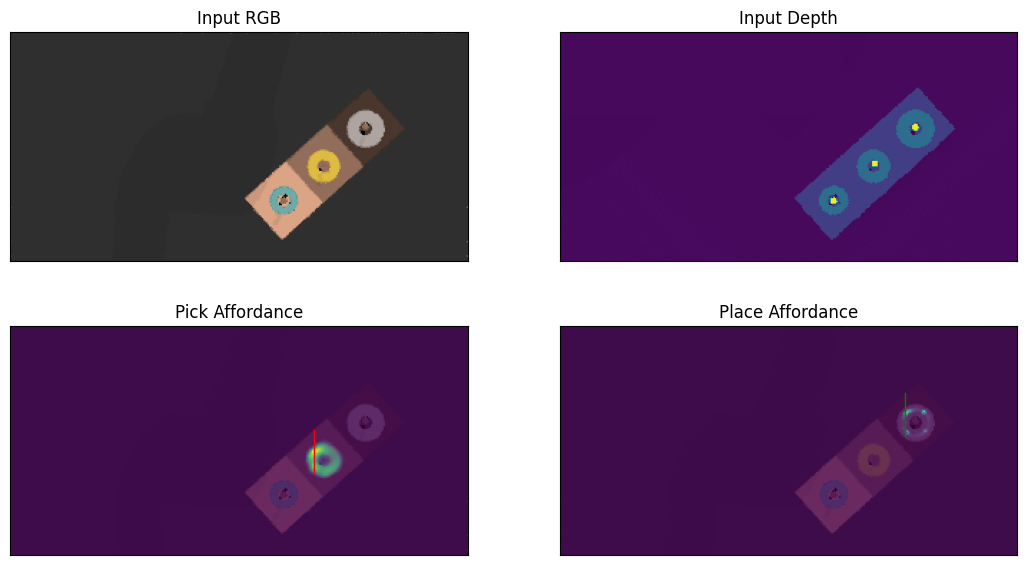

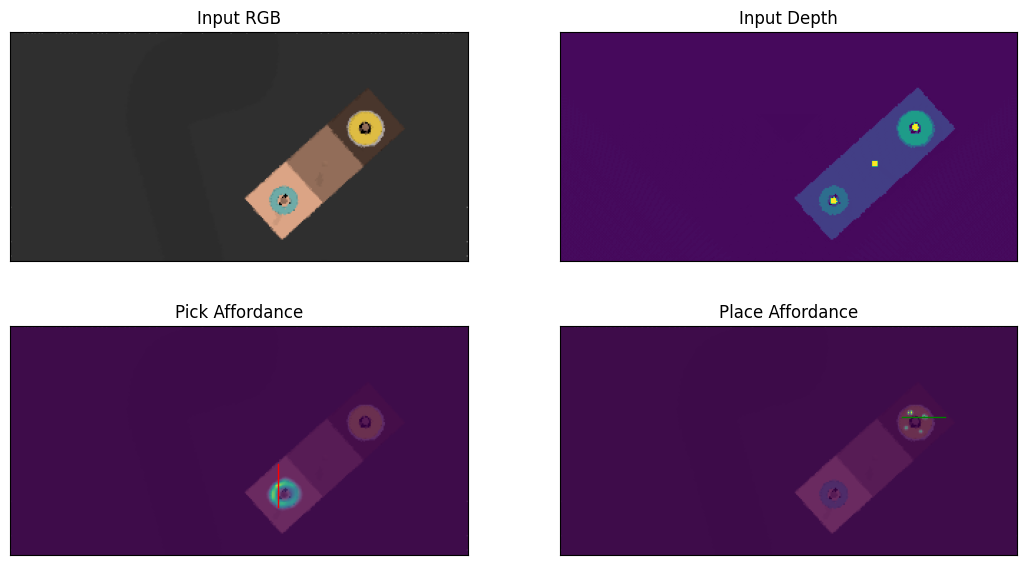

In [10]:
episode = 0
num_eval_instances = min(n_eval, ds.n_episodes)

for i in range(num_eval_instances):
    print(f'\nEvaluation Instance: {i + 1}/{num_eval_instances}')
    
    # Load episode
    episode, seed = ds.load(i)
    goal = episode[-1]
    total_reward = 0
    np.random.seed(seed)
    
    # Set task
    task_name = vcfg['eval_task']
    print("Task name: ", task_name)
    # print(f"State:{env.task.lang_initial_state}")
    task = tasks.names[task_name]()
    print(tasks)
    task.mode = mode
    
    # Set environment
    env.seed(seed)
    env.set_task(task)
    obs = env.reset()
    info = env.info
    reward = 0
    
    step = 0
    done = False
    
    # Rollout
    while (step <= task.max_steps) and not done:
        print(f"Step: {step} ({task.max_steps} max)")
        
        # Get batch
        if step == task.max_steps-1:
            batch = ds.process_goal((obs, None, reward, info), perturb_params=None)
        else:
            batch = ds.process_sample((obs, None, reward, info), augment=False)

        fig, axs = plt.subplots(2, 2, figsize=(13, 7))
        
        # Get color and depth inputs
        img = batch['img']
        img = torch.from_numpy(img)
        color = np.uint8(img.detach().cpu().numpy())[:,:,:3]
        color = color.transpose(1,0,2)
        depth = np.array(img.detach().cpu().numpy())[:,:,3]
        depth = depth.transpose(1,0)
        
        # Display input color
        axs[0,0].imshow(color)
        axs[0,0].axes.xaxis.set_visible(False)
        axs[0,0].axes.yaxis.set_visible(False)
        axs[0,0].set_title('Input RGB')
        
        # Display input depth
        axs[0,1].imshow(depth)
        axs[0,1].axes.xaxis.set_visible(False)
        axs[0,1].axes.yaxis.set_visible(False)        
        axs[0,1].set_title('Input Depth')
        
        # Display predicted pick affordance
        axs[1,0].imshow(color)
        axs[1,0].axes.xaxis.set_visible(False)
        axs[1,0].axes.yaxis.set_visible(False)
        axs[1,0].set_title('Pick Affordance')
        
        # Display predicted place affordance
        axs[1,1].imshow(color)
        axs[1,1].axes.xaxis.set_visible(False)
        axs[1,1].axes.yaxis.set_visible(False)
        axs[1,1].set_title('Place Affordance')
        
        # Get action predictions
        l = str(info['lang_goal'])
        act = agent.act(obs, info, goal=None)
        pick, place = act['pick'], act['place']
        
        # Visualize pick affordance
        pick_inp = {'inp_img': batch['img'], 'lang_goal': l}
        pick_conf = agent.attn_forward(pick_inp)
        logits = pick_conf.detach().cpu().numpy()

        pick_conf = pick_conf.detach().cpu().numpy()
        argmax = np.argmax(pick_conf)
        argmax = np.unravel_index(argmax, shape=pick_conf.shape)
        p0 = argmax[:2]
        p0_theta = (argmax[2] * (2 * np.pi / pick_conf.shape[2])) * -1.0
    
        line_len = 30
        pick0 = (pick[0] + line_len/2.0 * np.sin(p0_theta), pick[1] + line_len/2.0 * np.cos(p0_theta))
        pick1 = (pick[0] - line_len/2.0 * np.sin(p0_theta), pick[1] - line_len/2.0 * np.cos(p0_theta))

        if draw_grasp_lines:
            axs[1,0].plot((pick1[0], pick0[0]), (pick1[1], pick0[1]), color='r', linewidth=1)
        
        # Visualize place affordance
        # l = ['move the cyan ring to the middle of the stand' , 'move the yellow ring to the middle of the stand', 'move the gray ring to the middle of the stand']
        place_inp = {'inp_img': batch['img'], 'p0': pick, 'lang_goal': l}
        place_conf = agent.trans_forward(place_inp)

        place_conf = place_conf.permute(1, 2, 0)
        place_conf = place_conf.detach().cpu().numpy()
        argmax = np.argmax(place_conf)
        argmax = np.unravel_index(argmax, shape=place_conf.shape)
        p1_pix = argmax[:2]
        p1_theta = (argmax[2] * (2 * np.pi / place_conf.shape[2]) + p0_theta) * -1.0
        
        line_len = 30
        place0 = (place[0] + line_len/2.0 * np.sin(p1_theta), place[1] + line_len/2.0 * np.cos(p1_theta))
        place1 = (place[0] - line_len/2.0 * np.sin(p1_theta), place[1] - line_len/2.0 * np.cos(p1_theta))

        if draw_grasp_lines:
            axs[1,1].plot((place1[0], place0[0]), (place1[1], place0[1]), color='g', linewidth=1)
        
        # Overlay affordances on RGB input
        pick_logits_disp = np.uint8(logits * 255 * affordance_heatmap_scale).transpose(1,0,2)
        place_logits_disp = np.uint8(np.sum(place_conf, axis=2)[:,:,None] * 255 * affordance_heatmap_scale).transpose(1,0,2)    

        pick_logits_disp_masked = np.ma.masked_where(pick_logits_disp < 0, pick_logits_disp)
        place_logits_disp_masked = np.ma.masked_where(place_logits_disp < 0, place_logits_disp)

        axs[1][0].imshow(pick_logits_disp_masked, alpha=0.75)
        axs[1][1].imshow(place_logits_disp_masked, cmap='viridis', alpha=0.75)
        
        print(f"Lang Goal: {str(info['lang_goal'])}")
        plt.savefig(f'/home/franka/fr3_workspace/RealWorldLLM/save_viz/cliport_only/heatmap/{eval_task}_{step}.png')
        
        # Act with the predicted actions
        obs, reward, done, info = env.step(act)
        step += 1
        
    if done:
        print("Done. Success.")
    else:
        print("Max steps reached. Task failed.")


In [11]:
env.task.lang_initial_state

'blue ring on top of green ring. green ring on top of brown ring. brown ring in lighter brown side. The rings can be moved in lighter brown side, middle of the stand, darker brown side. '